# K Nearest Neighbors

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

## Get the Data 

In [2]:
#https://www.kaggle.com/c/titanic/data

url='https://drive.google.com/file/d/1zyYJMa75UXLjmODPRnl4_UrLJ0JKmEOC/view?usp=sharing'
url_='https://drive.google.com/uc?id=' + url.split('/')[-2]
titanic_data = pd.read_csv(url_)

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Preprocessing

In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)

In [7]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [8]:
set(titanic_data['Embarked'])

{'C', 'Q', 'S', nan}

In [9]:
titanic_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [10]:
titanic_data['Embarked'].fillna('S', inplace=True)

In [11]:
titanic_data['Sex'] = LabelEncoder().fit_transform(titanic_data['Sex'])

In [12]:
titanic_data['Embarked'] = LabelEncoder().fit_transform(titanic_data['Embarked'])

In [13]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


## Train Test Split

In [14]:
X = titanic_data.drop(['Survived'], axis = 1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Standardize the Variables

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

## KNN model

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [20]:
pred = knn.predict(scaled_X_test)

## Evaluation

In [21]:
print(confusion_matrix(y_test,pred))

[[85 21]
 [23 50]]


In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       106
           1       0.70      0.68      0.69        73

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



In [23]:
print(accuracy_score(y_test,pred))

0.7541899441340782


## Choosing a K Value

In [24]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

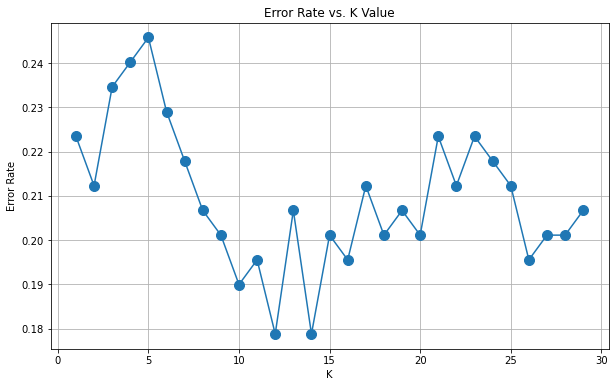

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[97  9]
 [25 48]]

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       106
           1       0.84      0.66      0.74        73

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

